# Talent Squad I

Primero se importan las librerías necesarias.

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Tenemos información sobre los parámetros medidos de los diferentes sensores de cohetes. Se pretende predecir el estado del cohete en función de las mediciones de los sensores.

- Target 0 corresponde a **Estable**
- Target 1 corresponde a **Turbulencia Ligera**
- Target 2 corresponde a **Turbulencia Moderada**
- Target 3 corresponde a **Turbulencia Severa**
- Target 4 corresponde a **Turbulencia Extrema**

In [66]:
df_train = pd.read_csv("space_X_train.csv")
df_test = pd.read_csv("space_X_test.csv")
df_train.drop("Unnamed: 0", axis=1, inplace=True)
df_test.drop("Unnamed: 0", axis=1, inplace=True)

display(df_train.head(5))
display(df_test.head(5))

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


En un primer análisis de los datos, comprobamos que se mueven en el mismo rango, de menor a mayor, con el sensor 2 ligeramente superior siempre.

En el análisis de correlaciones se observa que la medición del primer sensor es la más correlacionada con la clase.

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


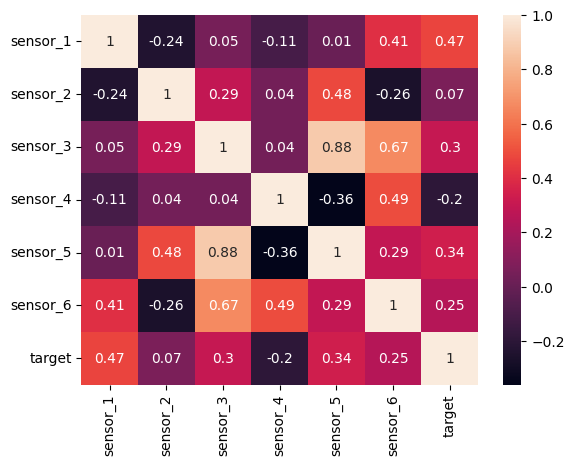

In [67]:
display(df_train.describe())

matrix = df_train.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

Separamos los datos y definimos las clases.

In [68]:
(rows, columns) = df_train.shape
X = df_train.iloc[:, 0:(columns - 1)]
y = df_train.iloc[:, (columns-1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9949)

class_names = ["0", "1", "2", "3", "4"]

A continuación se hace un entrenamiento y evaluación de los principales sistemas de multi-clasificación, con el objetivo de encontrar el que mejor se comporta para este problema y proceder después a una búsqueda de hiperparámetros.

In [69]:
def entrena_y_evalua(X_train, X_test, y_train, y_test, sistema):
    if sistema == "KNeighborsClassifier":
        sys = KNeighborsClassifier()
    elif sistema == "GaussianNB":
        sys = GaussianNB()
    elif sistema == "DecisionTreeClassifier":
        sys = DecisionTreeClassifier(random_state=1234)
    elif sistema == "RandomForestClassifier":
        sys = RandomForestClassifier(random_state=1234, n_jobs=-1)
    elif sistema == "AdaBoostClassifier":
        sys = AdaBoostClassifier(random_state=1234)
    elif sistema == "SVC":
        sys = SVC(max_iter=100000)
    elif sistema == "LinearSVC":
        sys = LinearSVC(max_iter=1000000)
    elif sistema == "LogisticRegression":
        sys = LogisticRegression(max_iter=100000)
    elif sistema == "ovo(rl)":
        sys = OneVsOneClassifier(LogisticRegression(max_iter=100000))
    elif sistema == "ovo(svc)":
        sys = OneVsOneClassifier(SVC(max_iter=1000000))
    elif sistema == "ovr(rl)":
        sys = OneVsRestClassifier(LogisticRegression(max_iter=1000000))
    elif sistema == "ovr(svc)":
        sys = OneVsRestClassifier(SVC(max_iter=1000000))
    else:
        print("Sistema no reconocido")
        exit()

    model = sys.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    resultados = metrics.classification_report(
        y_test, y_pred, output_dict=True)

    return [
        resultados["accuracy"],
        resultados["macro avg"]["precision"],
        resultados["macro avg"]["recall"],
        resultados["macro avg"]["f1-score"],
    ]

In [70]:
sistemas = [
    "KNeighborsClassifier",
    "GaussianNB",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "SVC",
    "LinearSVC",
    "LogisticRegression",
    "ovo(rl)",
    "ovo(svc)",
    "ovr(rl)",
    "ovr(svc)"
]

resultados = np.empty((len(sistemas), 4))
i = 0
for sistema in sistemas:
    resultados[i, :] = entrena_y_evalua(
        X_train, X_test, y_train, y_test, sistema)
    i += 1

Leemos los resultados obtenidos para cada sistema.

Podemos ver que el clasificador Random Forest (Bosques aleatorios), de tipo ensemble, es el que mejor precisión y puntuación F1 obtiene.

In [71]:
df_resultados = pd.DataFrame(
    resultados, index=sistemas, columns=[
        "Accuracy", "Precision", "Recall", "F1-score"]
)
print(df_resultados)

                        Accuracy  Precision    Recall  F1-score
KNeighborsClassifier    0.761905   0.764503  0.761887  0.761459
GaussianNB              0.592857   0.594566  0.589460  0.578321
DecisionTreeClassifier  0.688095   0.692750  0.686595  0.688060
RandomForestClassifier  0.769048   0.774145  0.769618  0.770072
AdaBoostClassifier      0.583333   0.573703  0.580058  0.571555
SVC                     0.759524   0.762837  0.758043  0.758528
LinearSVC               0.500000   0.446396  0.495856  0.439937
LogisticRegression      0.509524   0.483415  0.505660  0.484458
ovo(rl)                 0.530952   0.508266  0.526156  0.511366
ovo(svc)                0.757143   0.760446  0.755718  0.756148
ovr(rl)                 0.516667   0.481821  0.512565  0.478641
ovr(svc)                0.742857   0.745552  0.742032  0.742779


Se realiza una búsqueda de hiperparámetros para este clasificador.

In [72]:
n_estimators = range(60, 120)
hyperparameters = dict(n_estimators=n_estimators)

sys = RandomForestClassifier(n_jobs=-1, random_state=1234)

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

gs = GridSearchCV(
    sys, hyperparameters, scoring=["accuracy", "f1_macro"], cv=folds, verbose=3, refit="f1_macro", n_jobs=-1
)

res_gs = gs.fit(X, y)

print("Hiperparámetros: ", res_gs.cv_results_["params"])

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Hiperparámetros:  [{'n_estimators': 60}, {'n_estimators': 61}, {'n_estimators': 62}, {'n_estimators': 63}, {'n_estimators': 64}, {'n_estimators': 65}, {'n_estimators': 66}, {'n_estimators': 67}, {'n_estimators': 68}, {'n_estimators': 69}, {'n_estimators': 70}, {'n_estimators': 71}, {'n_estimators': 72}, {'n_estimators': 73}, {'n_estimators': 74}, {'n_estimators': 75}, {'n_estimators': 76}, {'n_estimators': 77}, {'n_estimators': 78}, {'n_estimators': 79}, {'n_estimators': 80}, {'n_estimators': 81}, {'n_estimators': 82}, {'n_estimators': 83}, {'n_estimators': 84}, {'n_estimators': 85}, {'n_estimators': 86}, {'n_estimators': 87}, {'n_estimators': 88}, {'n_estimators': 89}, {'n_estimators': 90}, {'n_estimators': 91}, {'n_estimators': 92}, {'n_estimators': 93}, {'n_estimators': 94}, {'n_estimators': 95}, {'n_estimators': 96}, {'n_estimators': 97}, {'n_estimators': 98}, {'n_estimators': 99}, {'n_estimators': 100}, {'n_estimators'

In [73]:
print("Mejor combinación de hiperparámetros: ", res_gs.best_params_)
print("Mejor rendimiento obtenido: %0.4f" % (res_gs.best_score_))

Mejor combinación de hiperparámetros:  {'n_estimators': 72}
Mejor rendimiento obtenido: 0.7709


In [74]:
# modelo entrenado
best_model = res_gs.best_estimator_
print(best_model)

RandomForestClassifier(n_estimators=72, n_jobs=-1, random_state=1234)


In [75]:
# se crea un generador de folds estratificados partiendo el conjunto en 10 trozos
folds10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

# se realiza la validación cruzada para el RandomForest
scores_rf = cross_val_score(best_model, X, y, cv=folds10, scoring="f1_macro", verbose=1)
print("F1 macro (mean+-std): %0.4f +- %0.4f" % (scores_rf.mean(), scores_rf.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


F1 macro (mean+-std): 0.7709 +- 0.0256


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [76]:
# Compare with the default one.
folds10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

scores_rf = cross_val_score(RandomForestClassifier(n_jobs=-1, random_state=1234), X, y, cv=folds10, scoring="f1_macro", verbose=1)
print("F1 macro (mean+-std): %0.4f +- %0.4f" % (scores_rf.mean(), scores_rf.std()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


F1 macro (mean+-std): 0.7652 +- 0.0266


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


Finalmente, se utiliza el mejor modelo obtenido para predecir las clases de nuestro conjunto de test, y guardar los resultados.

In [93]:
y_pred = best_model.predict(df_test)
y_pred = pd.DataFrame(y_pred, columns=["Predictions"])
y_pred.to_csv("results.csv", header=True, index=False)